In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import joblib
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

In [2]:
#fetching data into variable
df = pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
#checking the total rows and total columns
df.shape

(18249, 14)

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [6]:
#Extract the Month from DOB into separate column
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [7]:
#Extract the Date from DOB into separate column
df['Date'] = pd.DatetimeIndex(df['Date']).day
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [8]:
#checking the value counts of each date
df.Date.value_counts()

4     756
11    756
18    755
25    755
8     648
10    648
19    648
5     648
22    648
15    648
24    648
17    648
26    648
12    648
1     648
3     648
27    540
28    540
7     540
13    540
21    540
29    540
20    540
14    540
6     539
2     432
31    432
23    432
9     432
30    432
16    432
Name: Date, dtype: int64

In [9]:
#checking the value counts of each type
df.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [10]:
#co relation of total volume to total bag
df[['Total Volume','Total Bags']].corr()

,Total Volume,Total Bags
Total Volume,1.000000,0.963047
Total Bags,0.963047,1.000000


In [11]:
#checking the average year of volume of avacado per year
df.groupby('year')['Total Volume'].mean()

year
2015    7.810274e+05
2016    8.584206e+05
2017    8.623393e+05
2018    1.066928e+06
Name: Total Volume, dtype: float64

In [12]:
#checking the organic type of avacado 
organic = df[df['type'] == 'organic']
organic

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
9126,0,27,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,0.0,organic,2015,Albany,12
9127,1,20,1.89,1163.03,30.24,172.14,0.00,960.65,960.65,0.00,0.0,organic,2015,Albany,12
9128,2,13,1.85,995.96,10.44,178.70,0.00,806.82,806.82,0.00,0.0,organic,2015,Albany,12
9129,3,6,1.84,1158.42,90.29,104.18,0.00,963.95,948.52,15.43,0.0,organic,2015,Albany,12
9130,4,29,1.94,831.69,0.00,94.73,0.00,736.96,736.96,0.00,0.0,organic,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,4,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,8,28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,9,21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,10,14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


In [13]:
#checking the mean of price at each year of organic type of avacado
organic.groupby('year')['AveragePrice'].mean()

year
2015    1.673324
2016    1.571684
2017    1.735521
2018    1.567176
Name: AveragePrice, dtype: float64

In [14]:
#finding how much type of avacado is sell in last 4 year
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

In [15]:
#total no of sale in each year of  4 years
df.groupby('year')['Total Volume'].count()

year
2015    5615
2016    5616
2017    5722
2018    1296
Name: Total Volume, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  int64  
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
 14  Month         18249 non-null  int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 2.1+ MB


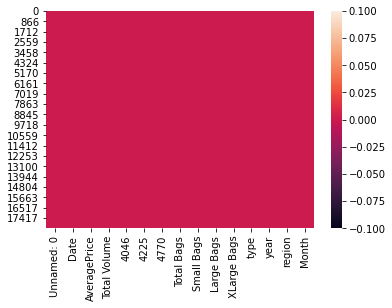

In [64]:
#checking null values using heatmap
sns.heatmap(df.isnull())

plt.savefig("null.jpg")

In [18]:
df.describe()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
count,18249.000000,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,24.232232,15.662612,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215
std,15.481045,8.776281,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130
min,0.000000,1.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000
25%,10.000000,8.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000
50%,24.000000,16.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000
75%,38.000000,23.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000
max,52.000000,31.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000


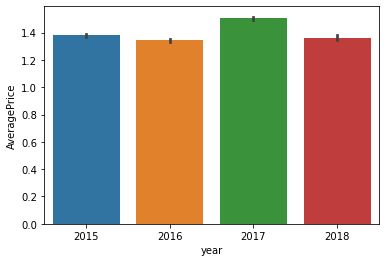

In [65]:
#checking ratio of year and price that which year had max average price
sns.barplot(x = "year" , y = "AveragePrice" ,data=df )
plt.savefig("yeartoyearprice.jpg")

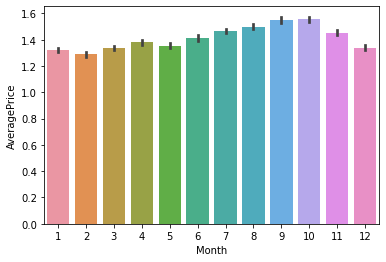

In [66]:
#checking ratio of month and price that which year had max average price
sns.barplot(x = "Month" , y = "AveragePrice" ,data=df )
plt.savefig("eachmonthprice.jpg")

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

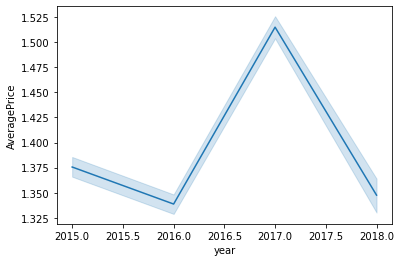

In [21]:
sns.lineplot(x = 'year', y = 'AveragePrice', data=df)

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

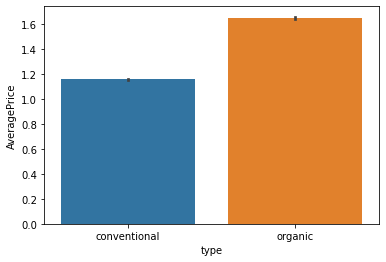

In [22]:
#checking ratio of type and price that which year had max average price
sns.barplot(x = "type" , y = "AveragePrice" ,data=df )

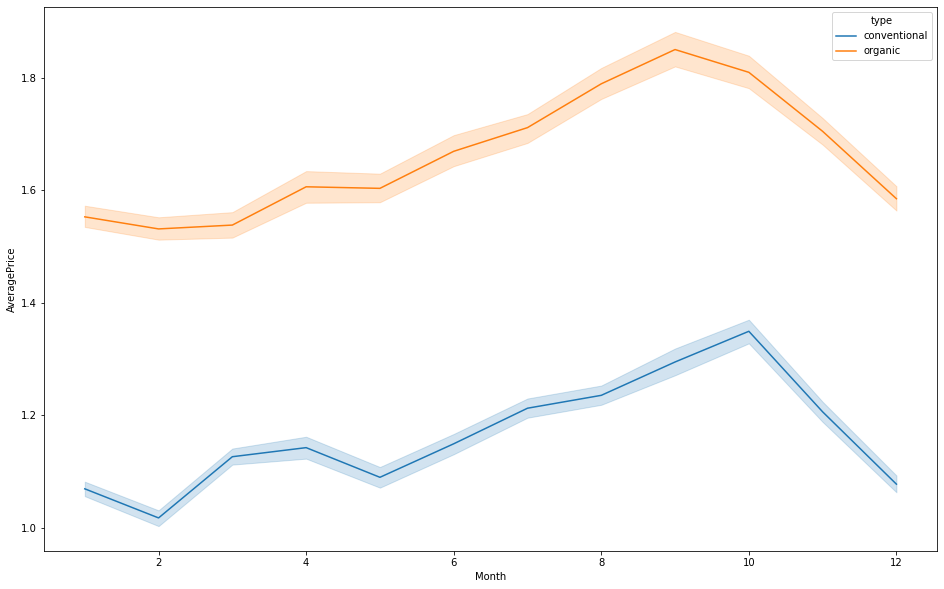

In [23]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

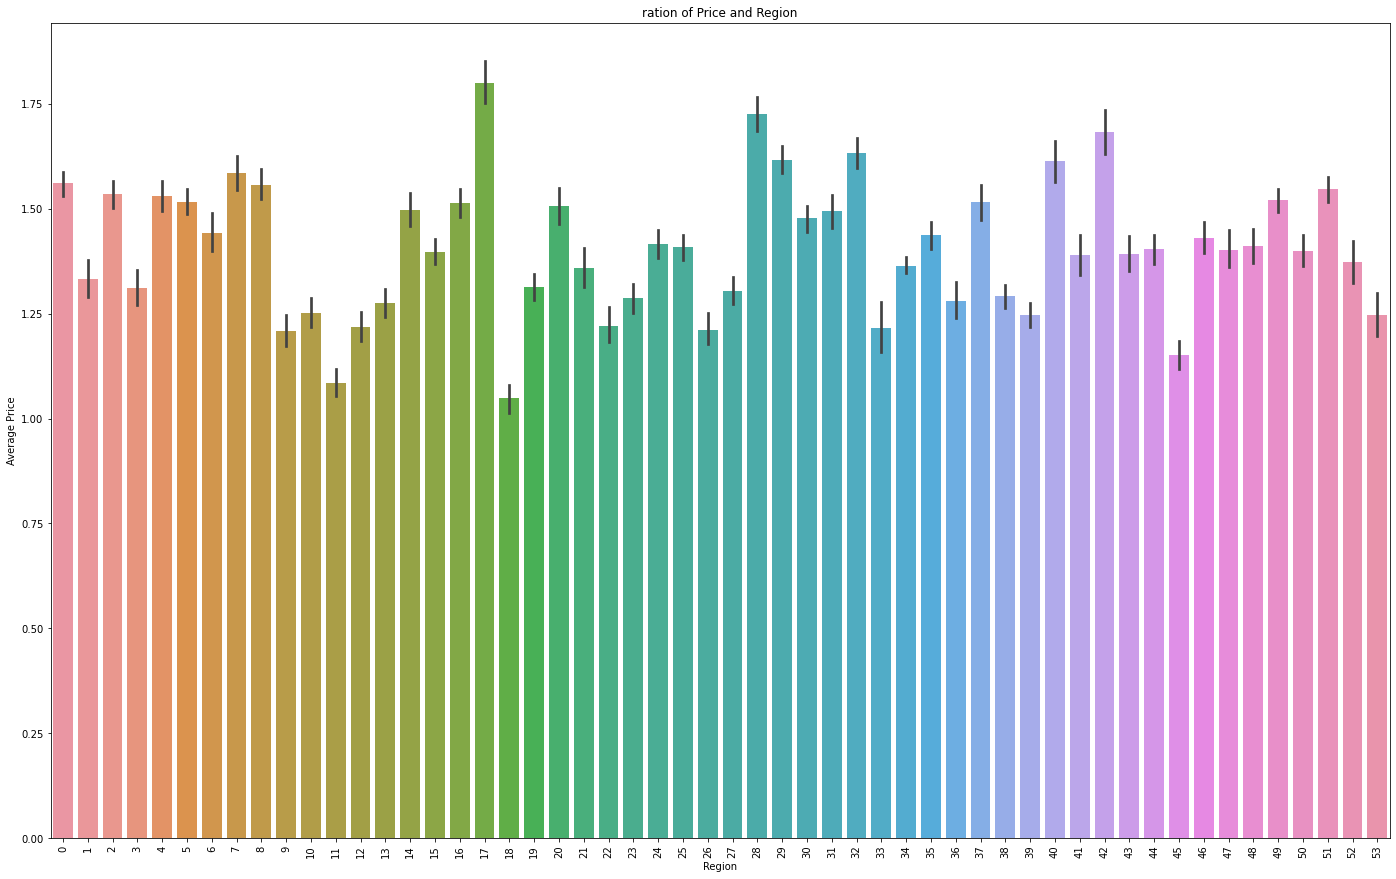

In [67]:
plt.figure(figsize=(24,15))
sns.barplot(x='region',y='AveragePrice',data=df)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('ration of Price and Region')
plt.savefig("priceandregion.jpg")

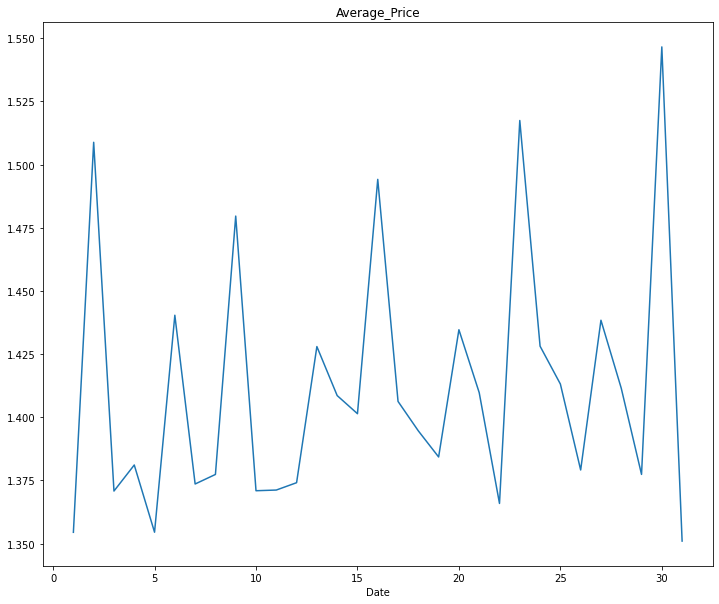

In [68]:
date=df.groupby('Date').mean()
plt.figure(figsize=(12,10))
date['AveragePrice'].plot()
plt.title('Average_Price')
plt.savefig("meanpricedays.jpg")

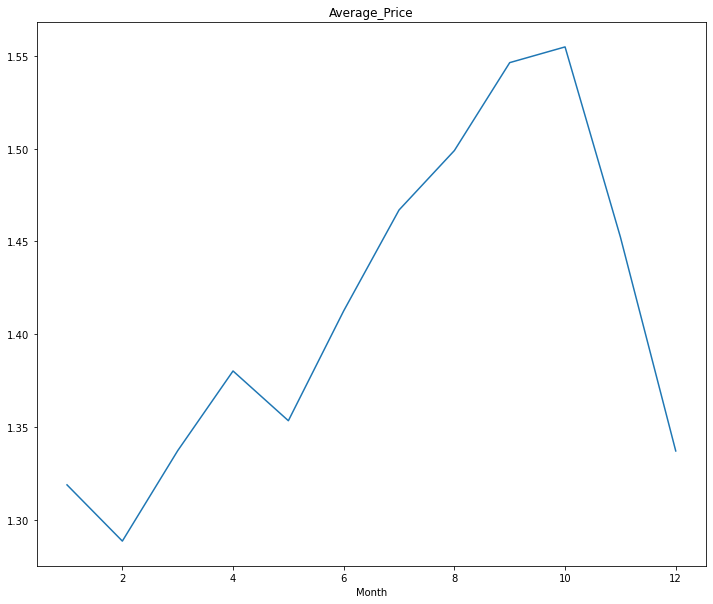

In [69]:
month=df.groupby('Month').mean()
plt.figure(figsize=(12,10))
month['AveragePrice'].plot()
plt.title('Average_Price')
plt.savefig("meanpricemonths.jpg")

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>],
       [<AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>],
       [<AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'Month'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

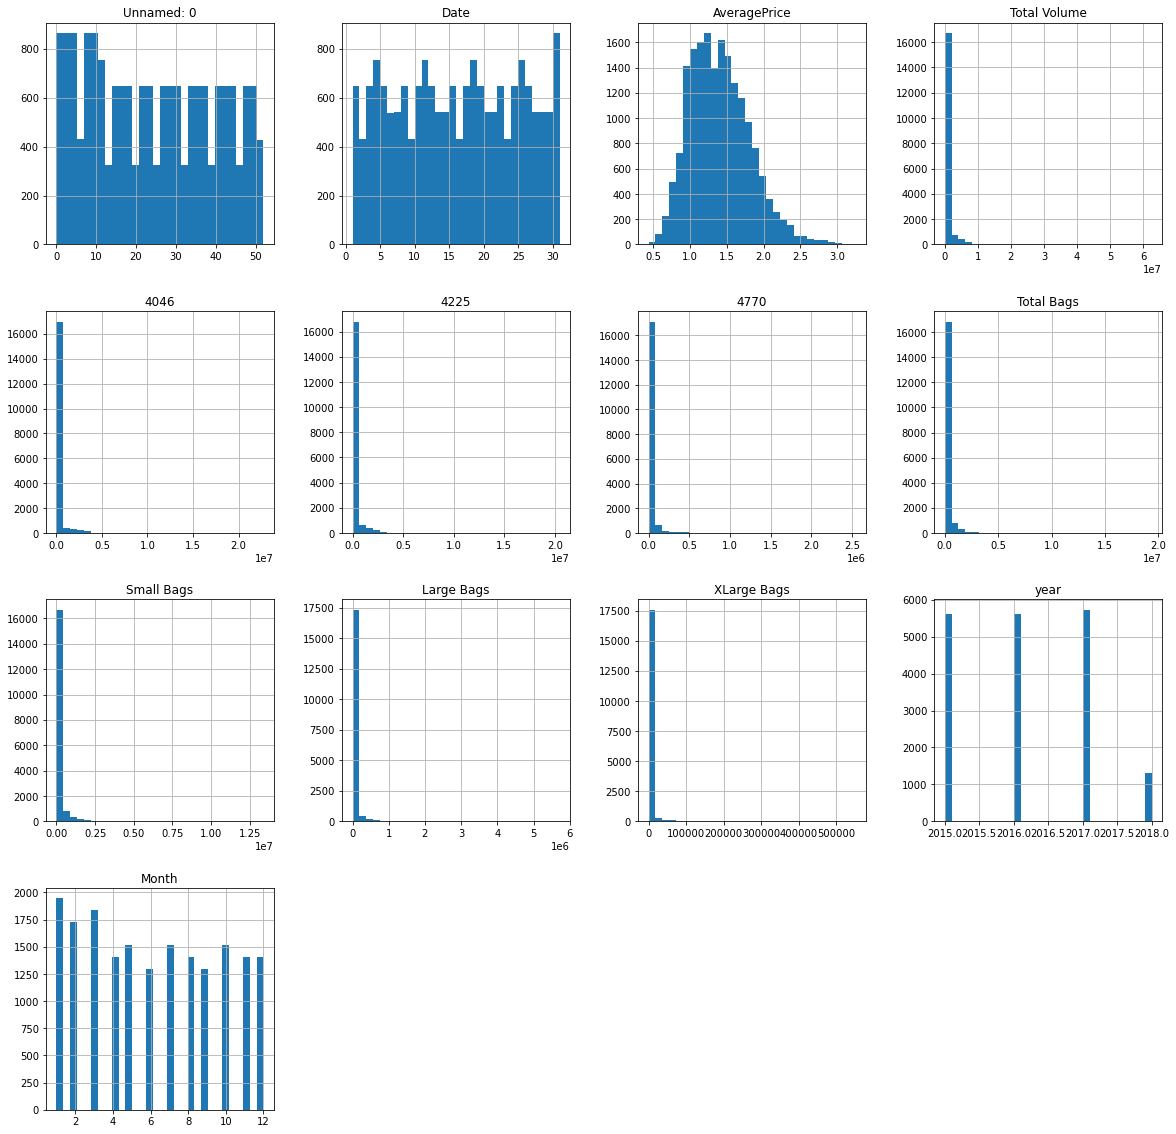

In [27]:
#plotting histogram for univariate analysis and checking the Normal Distribution
df.hist(figsize=(20,20), grid = True, layout = (4,4), bins = 30)

In [28]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [29]:
#Making the categorical data into numercial for better EDA
column = ['type','region']
le = LabelEncoder()
for i in column:
    df[i] = le.fit_transform(df[i].astype(str))

print(df.dtypes)

Unnamed: 0        int64
Date              int64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int64
year              int64
region            int64
Month             int64
dtype: object


In [30]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11


In [31]:
df.type  =df.type.astype(float)

Unnamed: 0          AxesSubplot(0.125,0.71587;0.133621x0.16413)
Date             AxesSubplot(0.285345,0.71587;0.133621x0.16413)
AveragePrice      AxesSubplot(0.44569,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4046             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
4225               AxesSubplot(0.125,0.518913;0.133621x0.16413)
4770            AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Total Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.606034,0.518913;0.133621x0.16413)
Large Bags      AxesSubplot(0.766379,0.518913;0.133621x0.16413)
XLarge Bags        AxesSubplot(0.125,0.321957;0.133621x0.16413)
type            AxesSubplot(0.285345,0.321957;0.133621x0.16413)
year             AxesSubplot(0.44569,0.321957;0.133621x0.16413)
region          AxesSubplot(0.606034,0.321957;0.133621x0.16413)
Month           AxesSubplot(0.766379,0.321957;0.133621x0.16413)
dtype: object

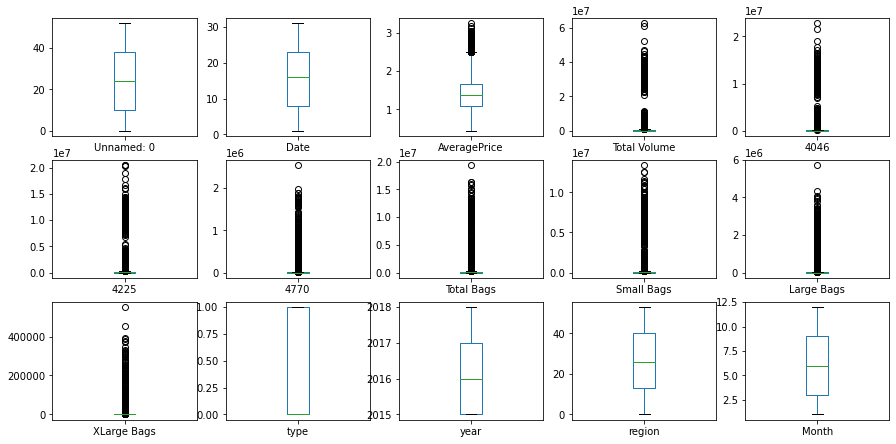

In [32]:
#plotting the boxplot of each column to check the outliers 
df.plot(kind='box',subplots = True,layout=(4,5),figsize = (15,10))

In [33]:
#calculate the zscore
z = np.abs(zscore(df))
print(z)

[[1.5653269  1.29185687 0.18868864 ... 1.22128204 1.7002522  1.64763162]
 [1.50073001 0.49423066 0.13901962 ... 1.22128204 1.7002522  1.64763162]
 [1.43613312 0.30339555 1.18206895 ... 1.22128204 1.7002522  1.64763162]
 ...
 [0.98395486 0.60817726 1.15237477 ... 1.97050371 1.70081131 1.46495942]
 [0.91935797 0.18944895 1.30138182 ... 1.97050371 1.70081131 1.46495942]
 [0.85476108 0.98707516 0.53151208 ... 1.97050371 1.70081131 1.46495942]]


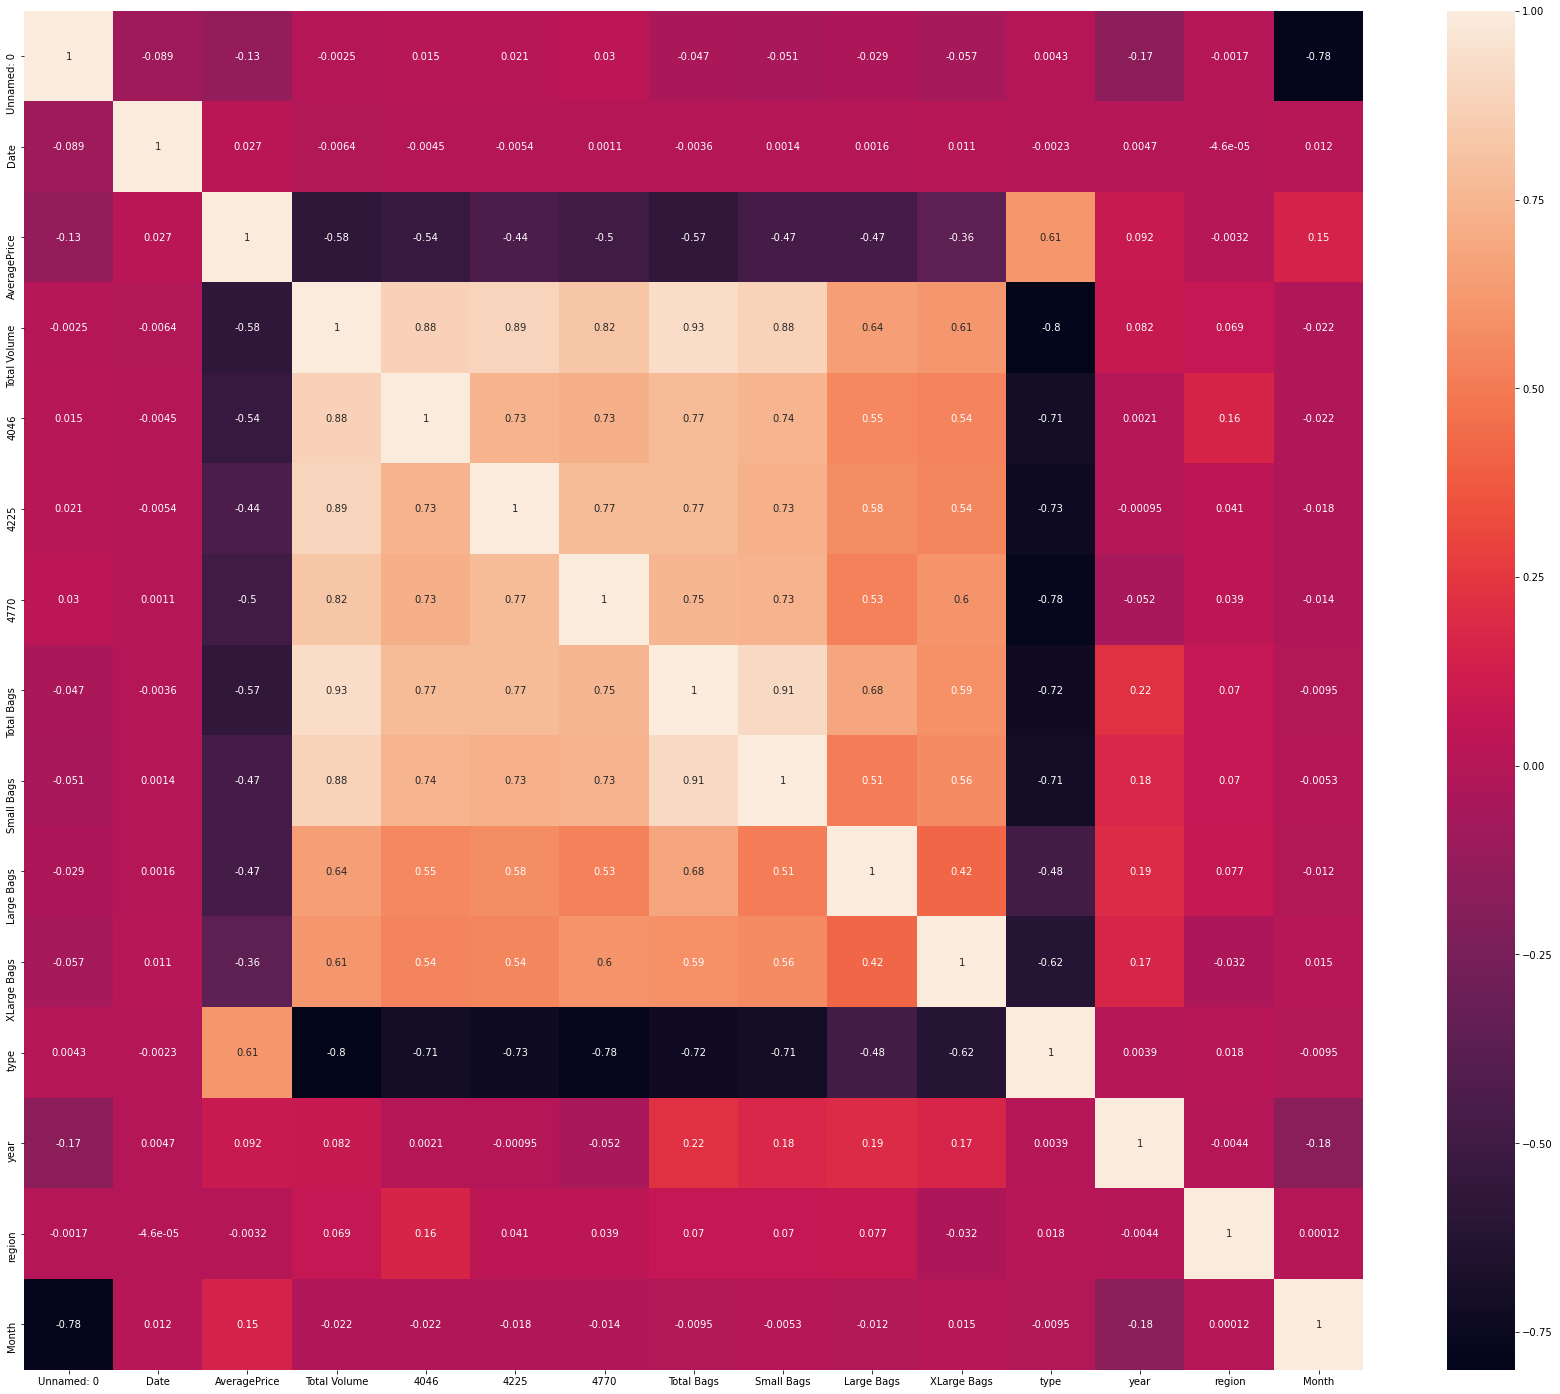

In [70]:
#checking the co-relation of all column to each other
df_cor = df.corr()
plt.figure(figsize=(30,25))
sns.heatmap(df_cor,annot=True)
plt.plot()
plt.savefig("corelation.jpg")

In [35]:
threshold = 3
print(np.where(z<3))
print(df.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248]), array([ 0,  1,  2, ..., 12, 13, 14]))
(18249, 15)


In [36]:
#Assign the value to df_new which are less the threshold value and removing the outliers
df_new = df[(z<3).all(axis = 1)]

In [37]:
print(df.shape)
print(df_new.shape)
df = df_new
print('Shape after removing outlires',df.shape)

(18249, 15)
(17651, 15)
Shape after removing outlires (17651, 15)


In [38]:
#now finding the mean value of each column 
print(df['4225'].mean())
print(df['Total Bags'].mean())
print(df['Small Bags'].mean())

165600.94489433893
129816.01636961184
100628.33843918175


In [39]:
#replace the outlier value to its mean value to remove outliers
df.loc[df['4225']<3,'4225'] = np.mean(df['4225'])
df.loc[df['Total Bags']<4.8,'Total Bags'] = np.mean(df['Total Bags'])
df.loc[df['Small Bags']<4,'Small Bags'] = np.mean(df['Small Bags'])

Unnamed: 0          AxesSubplot(0.125,0.71587;0.133621x0.16413)
Date             AxesSubplot(0.285345,0.71587;0.133621x0.16413)
AveragePrice      AxesSubplot(0.44569,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4046             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
4225               AxesSubplot(0.125,0.518913;0.133621x0.16413)
4770            AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Total Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.606034,0.518913;0.133621x0.16413)
Large Bags      AxesSubplot(0.766379,0.518913;0.133621x0.16413)
XLarge Bags        AxesSubplot(0.125,0.321957;0.133621x0.16413)
type            AxesSubplot(0.285345,0.321957;0.133621x0.16413)
year             AxesSubplot(0.44569,0.321957;0.133621x0.16413)
region          AxesSubplot(0.606034,0.321957;0.133621x0.16413)
Month           AxesSubplot(0.766379,0.321957;0.133621x0.16413)
dtype: object

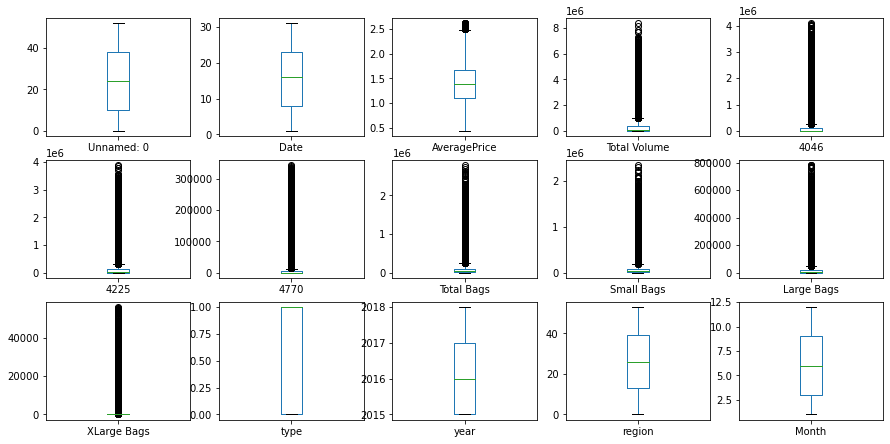

In [40]:
#plotting the boxplot of each column to check the outliers 
df.plot(kind='box',subplots = True,layout=(4,5),figsize = (15,10))

In [41]:
print(df.shape)
print(df_new.shape)
df = df_new
print('Shape after removing outlires',df.shape)

(17651, 15)
(17651, 15)
Shape after removing outlires (17651, 15)


In [42]:
df.skew()

Unnamed: 0      0.106116
Date            0.011778
AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455664
4770            5.117170
Total Bags      4.066780
Small Bags      4.222709
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
dtype: float64

In [43]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution
skew=('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')
for col in skew :
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [44]:
df.skew()

Unnamed: 0      0.106116
Date            0.011778
AveragePrice    0.377432
Total Volume   -0.049950
4046           -0.420273
4225           -0.503957
4770            0.068532
Total Bags     -0.319074
Small Bags     -0.435520
Large Bags     -0.610874
XLarge Bags     1.216238
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
dtype: float64

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>],
       [<AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>],
       [<AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'type'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'region'}>,
        <AxesSubplot:title={'center':'Month'}>, <AxesSubplot:>]],
      dtype=object)

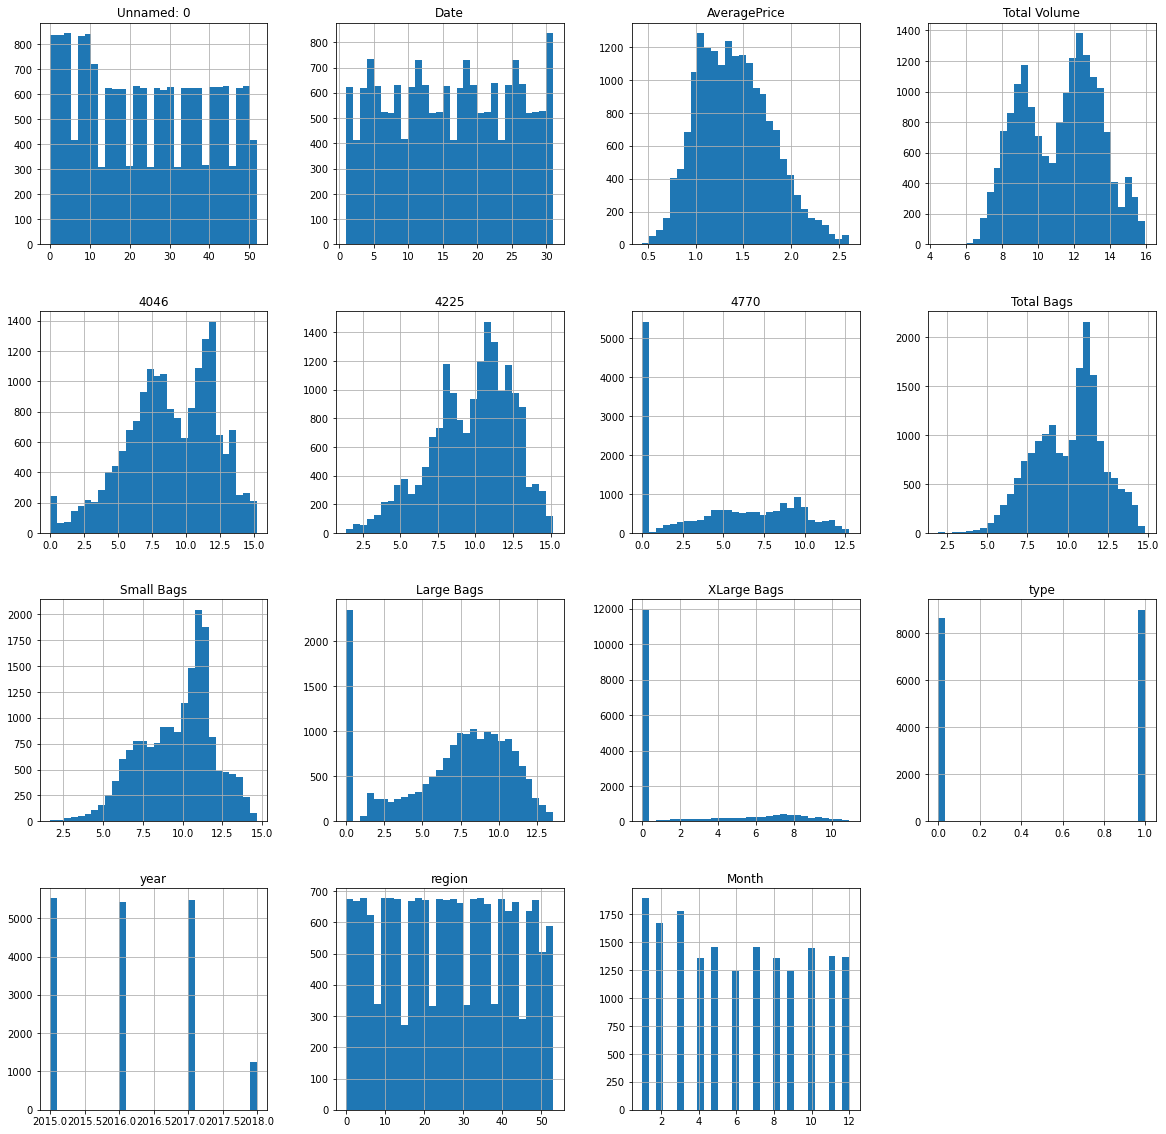

In [45]:
#plotting histogram for univariate analysis and checking the Normal Distribution
df.hist(figsize=(20,20), grid = True, layout = (4,4), bins = 30)

In [46]:
#assign the value of x and y for training and testing phase
x = df.drop(columns=['AveragePrice','Date'])
y = df[["AveragePrice"]]
print(x.shape)
print(y.shape)

(17651, 13)
(17651, 1)


In [47]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [48]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size = 0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score(test_y,pre)
        print("R2 score correspond to random state " ,r_state ,"is", r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score correspond to random state  40 is 0.7557174140182137
R2 score correspond to random state  40 is 0.7645823683205047
R2 score correspond to random state  40 is 0.5640071208329094
R2 score correspond to random state  40 is 0.5504646780206893
R2 score correspond to random state  40 is 0.7518857460285138
R2 score correspond to random state  41 is 0.7418711307035948
R2 score correspond to random state  41 is 0.74750048319041
R2 score correspond to random state  41 is 0.5433567858422468
R2 score correspond to random state  41 is 0.5404028661140505
R2 score correspond to random state  41 is 0.7499829631139571
R2 score correspond to random state  42 is 0.7434673644931276
R2 score correspond to random state  42 is 0.7552537850665513
R2 score correspond to random state  42 is 0.5433129478478258
R2 score correspond to random state  42 is 0.5469183175761081
R2 score correspond to random state  42 is 0.7482170376025961
R2 score correspond to random state  43 is 0.7398517920086309
R2 score c

In [49]:
KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(train_x,train_y)
pred = KNN.predict(test_x)
r2_sc = r2_score(test_y,pred)
print("R2 Score :",r2_sc*100)

R2 Score : 80.21447759141137


In [50]:
print('Mean Absolute Error: ', mean_absolute_error(test_y,pred))
print('Mean squared Error: ', mean_squared_error(test_y,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(test_y,pred)))

Mean Absolute Error:  0.12028240343347639
Mean squared Error:  0.029713540772532184
Root Mean Absolute Error:  0.3468175362254285


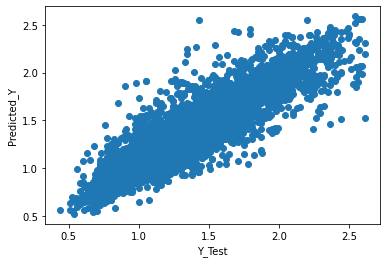

In [71]:
#checking the diff between actual and predicted value using graph
plt.scatter(x=test_y,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')
plt.savefig("actualvspred.jpg")

In [52]:
#importing library for classification prediction
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [53]:
#assign the value of x and y for training and testing phase
x_c = df.drop(columns=['region','Date'])
y_c = df[["region"]]
print(x_c.shape)
print(y_c.shape)

(17651, 13)
(17651, 1)


In [54]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x_c)
x_c = pd.DataFrame(x_c,columns=x_c.columns)

In [55]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score = 0
for r_state in range(40,90):
    train_xc,test_xc,train_yc,test_yc = train_test_split(x_c,y_c,random_state = r_state,test_size = 0.33)
    for i_c in model:
        i_c.fit(train_xc,train_yc)
        pre_c = i_c.predict(test_xc)
        ac_score = accuracy_score(test_yc,pre_c)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model = i_c
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model)

accuracy score correspond to random state  40 is 0.7818025751072961
accuracy score correspond to random state  40 is 0.5471244635193133
accuracy score correspond to random state  41 is 0.7703004291845493
accuracy score correspond to random state  41 is 0.5474678111587983
accuracy score correspond to random state  42 is 0.7812875536480687
accuracy score correspond to random state  42 is 0.5428326180257511
accuracy score correspond to random state  43 is 0.7831759656652361
accuracy score correspond to random state  43 is 0.5301287553648069
accuracy score correspond to random state  44 is 0.7864377682403434
accuracy score correspond to random state  44 is 0.5577682403433476
accuracy score correspond to random state  45 is 0.7890128755364807
accuracy score correspond to random state  45 is 0.5416309012875536
accuracy score correspond to random state  46 is 0.7909012875536481
accuracy score correspond to random state  46 is 0.5467811158798284
accuracy score correspond to random state  47 is

In [56]:
#Checking the best parameter for prediction of KNeighborsClassifier Algo using GridSearchCV
train_xc,test_xc,train_yc,test_yc = train_test_split(x_c,y_c,random_state = 76,test_size = 0.33)
KNC = KNeighborsClassifier()
parameters={'n_neighbors' : range(1,30)}
gridsearch=GridSearchCV(KNC,parameters)
gridsearch.fit(train_xc,train_yc)
gridsearch.best_params_

{'n_neighbors': 1}

In [57]:
KNC = KNeighborsClassifier(n_neighbors=1)
KNC.fit(train_xc,train_yc)
predc = KNC.predict(test_xc)
acu_score = accuracy_score(test_yc,predc)
print("Accuracy Score :",acu_score*100)

Accuracy Score : 66.21459227467811


In [58]:
#Calculating the scores of different parameters
score = cross_val_score(KNC,x_c,y_c,cv = 100,scoring='accuracy').mean()
print('Cross_val_score : ', score*100)
print('Mean Score      : ' , score.mean()*100)
print('STD score       : ' , score.std())

Cross_val_score :  52.59723292244478
Mean Score      :  52.59723292244478
STD score       :  0.0


In [59]:
pred_prob = KNC.predict_proba(test_xc)[:,1]
pred_prob

array([0., 0., 0., ..., 0., 0., 0.])

In [60]:
fpr,tpr,thresholds = roc_curve(test_yc,pred_prob,pos_label=True)

In [61]:
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)

[0.         0.00612209 1.        ]


[0.         0.55555556 1.        ]


[2. 1. 0.]


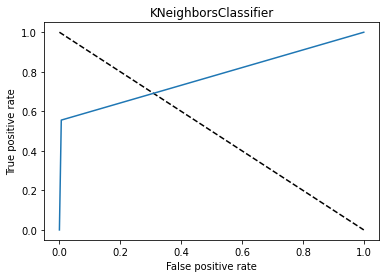

<Figure size 432x288 with 0 Axes>

In [72]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction

plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()
plt.savefig("finalplot.jpg")